In [45]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [46]:
from moara_for_qiskit import MoaraSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.providers import BaseBackend

In [47]:
def entanglerCX(circuit,n):
    for i in range(n-1):
        circuit.cx(i,i+1)

def RxRy(citrcuit,n):
    for i in range(n):
        citrcuit.rx(np.pi/3,i)
        citrcuit.ry(np.pi/5,i)

def XY(citrcuit,n):
    for i in range(n):
        citrcuit.x(i)
        citrcuit.y(i)

In [48]:
def test(i,j):
    qc=QuantumCircuit(i,i)
    for k in range(j):
        entanglerCX(qc,i)
        RxRy(qc,i)
        #XY(qc,i)
    qc.measure(range(i), range(i))
    return qc

In [49]:
def bench(simulator, max_depth, exec_func):
    i=2
    j=2
    depth=[]
    for i in range(10,max_depth):
        duration=0
        while (duration<0.50) and j<101:
            test_qc=test(i,j)
            start_time = time.time()
            a = exec_func(simulator, test_qc)
            a.get('0'*i,0)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [50]:
i=3
j=3
qc=test(i,j)
qc.draw()

┌──────────┐┌──────────┐                 ┌──────────┐┌──────────┐»
q_0: ──■──┤ RX(pi/3) ├┤ RY(pi/5) ├──────────────■──┤ RX(pi/3) ├┤ RY(pi/5) ├»
     ┌─┴─┐└──────────┘├──────────┤┌──────────┐┌─┴─┐└──────────┘├──────────┤»
q_1: ┤ X ├─────■──────┤ RX(pi/3) ├┤ RY(pi/5) ├┤ X ├─────■──────┤ RX(pi/3) ├»
     └───┘   ┌─┴─┐    ├──────────┤├──────────┤└───┘   ┌─┴─┐    ├──────────┤»
q_2: ────────┤ X ├────┤ RX(pi/3) ├┤ RY(pi/5) ├────────┤ X ├────┤ RX(pi/3) ├»
             └───┘    └──────────┘└──────────┘        └───┘    └──────────┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                      ┌──────────┐┌──────────┐            ┌─┐      
«q_0: ──────────────■──┤ RX(pi/3) ├┤ RY(pi/5) ├────────────┤M├──────
«     ┌──────────┐┌─┴─┐└──────────┘├──────────┤┌──────────┐└╥┘┌─┐   
«q_1: ┤ RY(pi/5) ├┤ X ├─────■──────┤ RX(pi/3) ├┤ RY(pi/5) ├─╫─┤M├───
«     ├──────────┤└───┘   ┌─┴─┐    ├──────────┤├──────────┤ ║ └╥┘┌─┐
«q_2: ┤ RY(pi/5) ├────────┤ X ├────┤ RX(pi/3) ├┤ RY(pi/5) ├─╫──╫─┤M├
«     └──────────┘        └───┘    └──────────┘└──────────┘ ║  ║ └╥┘
«c: 3/══════════════════════════════════════════════════════╩══╩══╩═
«                                                           0  1  2

In [51]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024)
print(result.result().get_counts())

from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
result2 = execute(qc, simulator2, shots=1024)
print(result2)

{'000': 41, '001': 210, '010': 14, '011': 139, '100': 321, '101': 38, '110': 143, '111': 118}
{'100': 227, '111': 122, '010': 7, '000': 38, '101': 35, '011': 142, '001': 314, '110': 139}


In [52]:
max_depth = 15

def exec_func(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=1024).result().get_counts(circ)

simulator=Aer.get_backend('qasm_simulator')
depth=bench(simulator,max_depth, exec_func)
print(depth)

[48, 53, 40, 39, 30]


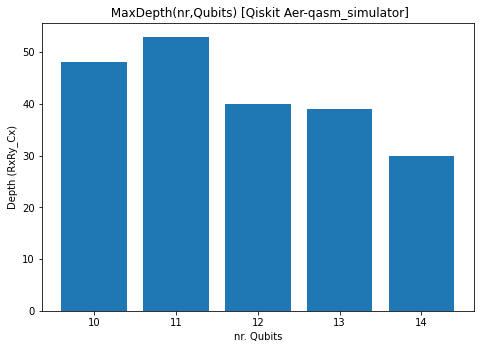

In [53]:
simulator_name='Qiskit Aer-qasm_simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(10,max_depth)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [54]:
max_depth = 15

def exec_func2(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=1024)

from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
depth2=bench(simulator2, max_depth, exec_func2)
print(depth2)

[87, 52, 27, 20, 9]


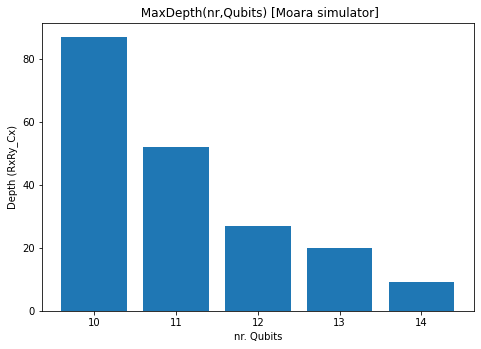

In [55]:
simulator_name2='Moara simulator'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(10,max_depth)]
ax.bar(langs,depth2)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name2+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [75]:
i=14
j=30
circ=test(i,j)
from moara_for_qiskit import MoaraSimulator
sim = MoaraSimulator()
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=1024)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

1.603492021560669


In [71]:
i=14
j=30
circ=test(i,j)

sim = Aer.get_backend('qasm_simulator')
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=1024).result().get_counts(circ)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

0.30499887466430664
